## CSPB 3202 Homework 5
### Name: Ning Chih Chang
### Github link: https://github.com/cs-s7udent/AI_hw

The homework is a Kaggle competition called "Histopathologic Cancer Detection" which challenges us to train a model that can identify tumor cell in photos. According to Cukierski (n.d.), the dataset is modified from the PatchCamelyon (Pcam) benchmark dataset. The dataset contains over 227,000 color photos that are size 96 * 96 pixels and two csv files that both are label information. From the characteristics of the challenge and dataset, we know that we are solving a classification problem using supervised learning.  


### Exploratory Data Analysis
I would like to explore the sample size and the characteristics of the images. Therefore, the size of the training and testing set are printed out. Also, an example image from the training set in numpy array and its shape are printed out. Lastly, I would like to look at the histogram of the training label data to understand if it is balanced.  

In [1]:
# code here has been reference to Scikit-image. (n.d.). *skimage.io.* Retrieved July 30, 2024, from https://scikit-image.org/docs/stable/api/skimage.io.html
import os
import skimage.io as skio

train = os.listdir("train")
print("The training set has " + str(len(train)) + " files")
# read image
f = skio.imread("train/" + train[0])
print("Here is a sample image in ndarray")
print(f)
print("The shape of that sample image is "+str(f.shape))
test = os.listdir("test")
print("The testing set has " + str(len(test)) + " files")

The training set has 220026 files
Here is a sample image in ndarray
[[[248 183 213]
  [234 167 198]
  [195 128 159]
  ...
  [225 168 187]
  [193 125 148]
  [236 161 184]]

 [[193 134 162]
  [255 223 251]
  [162 101 132]
  ...
  [190 131 153]
  [248 183 205]
  [229 155 180]]

 [[141  91 116]
  [255 218 246]
  [162 107 136]
  ...
  [219 157 182]
  [208 142 169]
  [194 124 152]]

 ...

 [[124  58  96]
  [171 101 138]
  [225 151 188]
  ...
  [186 119 152]
  [191 124 159]
  [199 132 167]]

 [[ 97  40  75]
  [ 93  31  68]
  [152  82 118]
  ...
  [194 123 157]
  [208 138 175]
  [202 131 171]]

 [[ 75  23  59]
  [105  49  84]
  [192 127 161]
  ...
  [183 109 146]
  [219 147 185]
  [148  77 119]]]
The shape of that sample image is (96, 96, 3)
The testing set has 57458 files


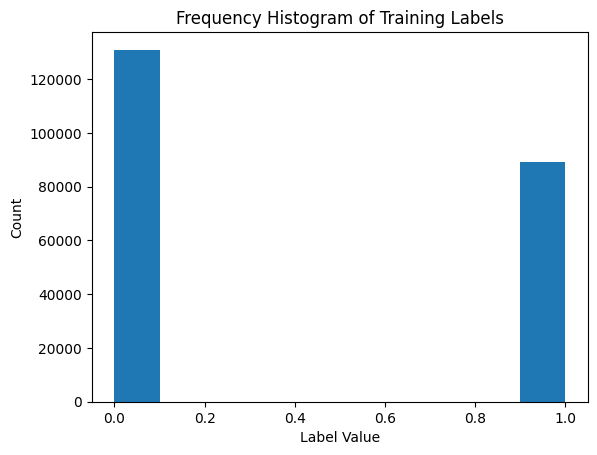

In [2]:
# code here has been referenced to Pandas. (n.d.). *pandas.read_csv.* Retrieved July 30, 2024, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame()
labels = np.array([])
with pd.read_csv("train_labels/train_labels.csv", chunksize=1000, iterator=True) as reader:
    for chunk in reader:
        labels = np.append(chunk["label"], labels)

plt.hist(labels)
plt.title("Frequency Histogram of Training Labels")
plt.ylabel("Count")
plt.xlabel("Label Value")
plt.show()

From the histogram, the quantity difference between two labels is not significant. We can see that the labels are binary, and we need to predict the testing data with answers that is either 1 (i.e., this is a cancer cell) or 0 (i.e., this is not a cancer cell). The model for this challenge can be Logistic Regression because we are dealing with binary classification problem. Yet, because the dataset is a collection of pictures with label information, CNN could be also an appropriate approach for this challenge. Ideally, I would like to try both and see which one can establish a better model. However, due to the time limitation, I will only use Logistic Regression for this homework.

Based on Galarnyk (2017) and Steegstra (2018), training Logistic Regression Model for image classification involves preprocessing data, training data and testing data. Scikit-Learn has various appropriate tools for this task.

First of all, the training images and labels are extracted from the dataset, transferred into numpy arrays, and split into training and validation sets. Then, we reshape the X training and validation sets from a 3D array to a 1D array due to the parameter requirement of the fitting function mentioned in Scikit-learn (n.d.-e). Furthermore, we standardize the reshaped training and validation sets and apply them with the training y and validation y set to build and test a Logistic Regression model.

Here, we are going to preprocess data, which includes extracting the training images and labels into two numpy arrays, splitting into training and validation sets, and reshaping the sets. Furthermore, the shape of each training and validation sets are printed.

In [3]:
# code here has been reference to Python. (2024, July 28). *csv — CSV File Reading and Writing.* https://docs.python.org/3/library/csv.html
# code here has been reference to Scikit-image. (n.d.). *skimage.io.* Retrieved July 30, 2024, from https://scikit-image.org/docs/stable/api/skimage.io.html
# code here has been referenced to Steegstra, P. (2018, April 10). *Tutorial: image classification with scikit-learn.* Kapernikov. https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
# extract training image data and label
import os
import csv
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = dict()
data["filename"]=[]
data["label"]=[]
data["data"]=[]

with open("train_labels\\train_labels.csv", newline='') as csvfile:
    f = csv.reader(csvfile)
    for row in f:
        if row[0] != "id":
            filename = "train\\"+row[0]+".tif"
            data["filename"].append(row[0])
            arr = skio.imread(filename)
            data["data"].append(arr)
            data["label"].append(row[1])

X = np.array(data['data'])
y = np.array(data['label'])


In [4]:
# code here has been referenced to Numpy. (n.d.). *numpy.reshape.* Retrieved July 30, 2024, from https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# code here has been referenced to Steegstra, P. (2018, April 10). *Tutorial: image classification with scikit-learn.* Kapernikov. https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
# split training data into two sets: training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# reshape
qty, w, h, c = X_train.shape
X_train_2d = X_train.reshape(qty, w*h*c)
qty, w, h, c = X_valid.shape
X_valid_2d = X_valid.reshape(qty, w*h*c)

print("X_train is " + str(X_train.shape))
print("Reshaped X_train is " + str(X_train_2d.shape))
print("X_valid is " + str(X_valid.shape))
print("Reshaped X_valid is " + str(X_valid_2d.shape))
print("y_train is " + str(y_train.shape))
print("y_valid is " + str(y_valid.shape))

X_train is (176020, 96, 96, 3)
Reshaped X_train is (176020, 27648)
X_valid is (44005, 96, 96, 3)
Reshaped X_valid is (44005, 27648)
y_train is (176020,)
y_valid is (44005,)


In [5]:
# code here has been referenced to Scikit-learn. (n.d.-g). *6.3. Preprocessing data.* Retrieved July 31, 2024 from https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
# standardlize 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_2d_stand = scaler.fit_transform(X_train_2d)
X_valid_2d_stand = scaler.transform(X_valid_2d)

The solver of the Logistic Regression model is 'sag' and tolerance is 0.1. This combination is a result of multiple experiments and will be discussed in the Discussion and Limitation section.

In [6]:
# code here has been referenced to Scikit-learn. (n.d.-e). *Logistic Regression.* Retrieved July 30, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
# fit the model
model = LogisticRegression(fit_intercept=False, tol=0.1, solver="sag", n_jobs=-1)
model.fit(X_train_2d_stand, y_train)
print("The intercept of this model is " + str(model.intercept_))
print("The coefficients of this model are " + str(model.coef_))

The intercept of this model is [0.]
The coefficients of this model are [[ 0.01782879 -0.00574657 -0.00115942 ...  0.00871816 -0.00964919
   0.00340967]]


Using the model that we have developed, we are going to predict the y values of the x validation set. Also, the accuracy score, precision score, recall score and f1 score will be printed out. Moreover, the confusion matrix is displayed too.

In [7]:
# code here has been referenced to Scikit-learn. (n.d.-a). *accuracy_score.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# code here has been referenced to Scikit-learn. (n.d.-d). *f1_score.*  Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# code here has been referenced to Scikit-learn. (n.d.-f). *precision_score.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# code here has been referenced to Scikit-learn. (n.d.-h). *recall_score.* Retrieved July 31, 2024 from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# use model to predict the validation set
y_predict = model.predict(X_valid_2d_stand)
# print out all scores
print("The accuracy score is "+str(accuracy_score(y_valid, y_predict)))
print("The precision score is "+str(precision_score(y_valid, y_predict, pos_label='1')))
print("The recall score is "+str(recall_score(y_valid, y_predict, pos_label='1')))
print("The f1 score is "+str(f1_score(y_valid, y_predict, pos_label='1')))

The accuracy score is 0.6891035109646632
The precision score is 0.6012103606874849
The recall score is 0.6952189004590751
The f1 score is 0.6448061894747774


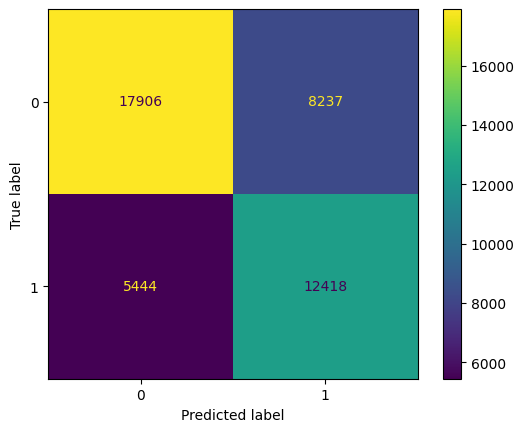

In [9]:
# code here has referenced to Scikit-learn. (n.d.-b). *confusion_matrix.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# code here has referenced to Scikit-learn. (n.d.-c). *ConfusionMatrixDisplay.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

cm = confusion_matrix(y_valid, y_predict, labels=model.classes_)
p = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
p.plot()

Due to the nature of this study, the False Negative Rate (FNR) is important because it would be dangerous to identify a positive image as a negative result. Based on “Confusion matrix” (2024), the False Negative Rate is the number of false negative divided by the total number of positive. From the Confusion matrix above, the False Negative rate is 5444/(5444+12418) = 0.3047. It is interesting to see that this model identifies more True Negative images (i.e., 17906) than True Positive images (i.e., 12418). This can be resulted from the ratio of the True/1 and Negative/0 images in the validation set since from the histogram above, we do see a trend that there are more training data with Negative/0 values than the Positive/1 values. The overall scores of this model are not impressive yet are the best at this moment. The suggested improvements are listed in the Discussion and Limitation section.

Next, we are going to extract the images in testing dataset to numpy arrays and run our model to get the prediction. Again, we would need to reshape and standardize it in order to feed it to our prediction function. Finally, we export our predictions into a csv file.

In [10]:
# code here has been referenced to Numpy. (n.d.). *numpy.reshape.* Retrieved July 30, 2024, from https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# code here has been reference to Scikit-image. (n.d.). *skimage.io.* Retrieved July 30, 2024, from https://scikit-image.org/docs/stable/api/skimage.io.html
# code here has been referenced to Steegstra, P. (2018, April 10). *Tutorial: image classification with scikit-learn.* Kapernikov. https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
test = dict()
test['id']=[]
test['data']=[]
f = os.listdir("test")
for i in f:
    if i.endswith(".tif"):
        arr = skio.imread("test\\"+i)
        filename = i.replace(".tif","")
        test['id'].append(str(filename))
        test['data'].append(arr)

X_test= np.array(test['data'])
# reshape
qty, w, h, c = X_test.shape
X_test_2d = X_test.reshape(qty, w*h*c)
print(X_test.shape)
print(X_test_2d.shape)

(57458, 96, 96, 3)
(57458, 27648)


In [11]:
# code here has been referenced to Scikit-learn. (n.d.-g). *6.3. Preprocessing data.* Retrieved July 31, 2024 from https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
# export
import pandas as pd
import numpy as np
df = pd.DataFrame()

# standardize the testing data
X_test_2d_stand = scaler.transform(X_test_2d)

# our final prediction
final_prediction = model.predict(X_test_2d_stand)

df['id'] = np.array(test['id'])
df['label'] = final_prediction

df.to_csv("final_results.csv", index_label=False, index=False)

### Discussion and Limitation:
Due to hardware limitations and time constraints, I believe that the optimal model for this challenge has not been found. This could be a result of an inappropriate model and/or parameters used in the model fitting process. The dataset may require more preprocessing steps (e.g., handling outliers) and this has not been identified in the exploratory data analysis. 

In general, model fitting takes over an hour, which makes it difficult to compare models with different combinations of parameters (e.g., solvers and max iterations). At first, the Logistic Regression Model with the default solver (i.e.,'lbfgs') has been used, however, it does not converge. From Scikit-learn (n.d.-e), the 'sag' solver is recommended for larger datasets and the 'newton-cholesky' solver is ideal when the sample size is much larger than the feature size. Since both of these solvers are suitable for this homework, both of them have been applied. However, only the 'newton-cholesky' solver converged but it took over 6 hours to complete. And, when we look at the accuracy value of validation sets, the converged model (i.e., Logistic Regression with the 'newton-cholesky' solver) is 0.6101 and the accuracy score of the non-converged model (i.e., Logistic Regression with the 'sag' solver) is 0.6159. The difference between these two models is very subtle. 
![newton-cholesky](nc.png)
![newton-cholesky-accuracy](nc_scores.png)
![sag](sag2.png)

According to Maksud (2014), I decide to change the tolerance value in order to speed up the model development process. When the tolerance value changes from the default value 0.0001 to 0.1, the running time significantly decreased in both 'sag' and 'newton-cholesky' solvers. Interestingly, the 'sag' solver converges when tolerance is 0.1 and gives an accuracy score of 0.6185. The 'newton-cholesky' solver with tolerance is 0.1 takes 4.5 hours and returns an accuracy score of 0.6102. Changing the tolerance value does greatly improve the fitting time, yet the accuracy scores do not improve.
![sag_tol](sag_tol.png)
![newton-cholesky_tol](nc_tol.png)

After trying several solvers (i.e., 'sag' and 'newton-cholesky') with different tolerance values, the accuracy scores among these experiments are still not very impressive. After reading some tips in Arora (2016), preprocessing data seems to be a good direction to go. According to Scikit-learn (n.d.-g), we can standardize the features or scale the features to a certain range, such as between 0 and 1, and this can be achieved by using the StandardScalar and MinMaxScalar, respectively. Using MinMaxScalar to preprocess the data before training does not make significant improvement to the accuracy score. However, the StandardScalar has slightly increased the accuracy scores as well as the precision, recall and f1 scores.  

![minmax](minmax_sag.png)
![standard](standard_sag.png)

Therefore, based on the increased scores, using StandardScalar to preprocess the data and Logistic Regression model with 'sag' solver and tolerance value of 0.1 has been identified the best model we can develop at this moment. The prediction has been submitted to Kaggle. The deadline of this Kaggle challenge has passed, and therefore, my submission cannot be added to the leaderboard. Thus, the print screen of my submission is shown below. The public score of my best model is 0.7303 and the private score is 0.6742.
![kaggle_result](kaggle_results.png)
  
There are room for improvements and some suggestions for future exploration are listed below:
1. There are other parameters of the Logistic Regression model that we have not touched (e.g., penalty) and other models, such as the SGDClassifier used in Steegstra (2018), which may have potential to achieve a better model.
2. Perform a deep dive of the training data. The exploratory data analysis is limited in this study and can be extended by looking at the distribution of the values and outliers.
3. There can be other preprocessing techniques that may be beneficial to model building, such as changing the color mode to grayscale in Steegstra (2018).
4. Perhaps the design of CNN makes it a more suitable training tool for our case. It would be interesting to try our challenge in CNN and see if can develop a better model.

### References
Arora, A. (2016, June 28). *Since machine learning is more about experimenting with the features and the models, there is no correct answer to your* [Comment on the online forum post *How to increase the model accuracy of logistic regression in Scikit python?*]. Stack Overflow. https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python

Confusion matrix. (2024, July 8). In *Wikipedia.* https://en.wikipedia.org/w/index.php?title=Confusion_matrix&oldid=1233255797

Cukierski, W. (n.d.). *Histopathologic Cancer Detection.* Kaggle. Retrieved July 30, 2024, from https://kaggle.com/competitions/histopathologic-cancer-detection

Galarnyk, M. (2017, September 13). *Logistic Regression using Python (scikit-learn).* Medium. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Maksud. (2014, August 6). *Try reducing data set size and changing tolerance parameter. For example you can try classifier = LogisticRegression(tol = 0.1)* [Comment on the online forum post *Speeding up sklearn logistic regression.*]. Stack Overflow. https://stackoverflow.com/questions/20894671/speeding-up-sklearn-logistic-regression

Numpy. (n.d.). *numpy.reshape.* Retrieved July 30, 2024, from https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

Pandas. (n.d.). *pandas.read_csv.* Retrieved July 30, 2024, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Python. (2024, July 28). *csv — CSV File Reading and Writing.* https://docs.python.org/3/library/csv.html

Scikit-image. (n.d.). *skimage.io.* Retrieved July 30, 2024, from https://scikit-image.org/docs/stable/api/skimage.io.html

Scikit-learn. (n.d.-a). *accuracy_score.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

Scikit-learn. (n.d.-b). *confusion_matrix.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Scikit-learn. (n.d.-c). *ConfusionMatrixDisplay.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

Scikit-learn. (n.d.-d). *f1_score.*  Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Scikit-learn. (n.d.-e). *Logistic Regression.* Retrieved July 30, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

Scikit-learn. (n.d.-f). *precision_score.* Retrieved July 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

Scikit-learn. (n.d.-g). *6.3. Preprocessing data.* Retrieved July 31, 2024 from https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

Scikit-learn. (n.d.-h). *recall_score.* Retrieved July 31, 2024 from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

Steegstra, P. (2018, April 10). *Tutorial: image classification with scikit-learn.* Kapernikov. https://kapernikov.com/tutorial-image-classification-with-scikit-learn/